<a href="https://colab.research.google.com/github/RmmR504/Portfolio/blob/Projects/Portfolio%20Supervised%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [ ]:
data = pd.read_csv('/content/Employee_Attrition_datos_reto_binario.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Data profiling

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

# Deleting all unnecesary variables.

In [ ]:
# Se procede a eliminar las variables EmployeeCount, StandardHours y Over18 porque es el mismo valor para todos los empleados, por lo tanto no tienen ningún impacto
# a la hora de hacer una clasificación o distinción. La otra variable a eliminar es EmployeeNumber ya que esta aparenta ser un código de empleado que tampoco nos sirve
# a la hora de hacer una clasificación.
data2 = data.drop(columns = ['EmployeeCount','EmployeeNumber','Over18','StandardHours'])
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

# Transforming categorical variables to numerical.

In [ ]:
# Utilizo dummies para transformar las variables con pocos registros diferentes.
data3 = pd.get_dummies(data2, columns=['Attrition','BusinessTravel','Department','Gender','MaritalStatus','OverTime','EducationField','JobRole'], drop_first=True)
data3.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,0,0,0,0,1,0
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,0,0,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,...,1,0,0,1,0,0,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,0,0,0,0,1,0,0
4,27,591,2,1,1,40,3,1,2,3468,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

dataScaler = RobustScaler()
scaler = dataScaler.fit(data3)
dataScaled = scaler.transform(data3)

data4 = pd.DataFrame(dataScaled)
data4.columns = data3.columns

# muestra las primeras 5 líneas del dataframe resultante
data4.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,0.384615,0.433526,-0.500000,-0.5,-0.5,0.783217,0.0,0.0,0.5,0.196416,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.000000,-0.755780,0.083333,-1.0,0.0,-0.139860,-1.0,0.0,-0.5,0.038588,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.076923,0.825145,-0.416667,-0.5,0.5,0.727273,-1.0,-0.5,0.0,-0.517374,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.230769,0.852601,-0.333333,0.5,0.5,-0.279720,0.0,-0.5,0.0,-0.367593,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.692308,-0.304913,-0.416667,-1.0,-1.0,-0.727273,0.0,-0.5,-0.5,-0.265362,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   float64
 1   DailyRate                          1470 non-null   float64
 2   DistanceFromHome                   1470 non-null   float64
 3   Education                          1470 non-null   float64
 4   EnvironmentSatisfaction            1470 non-null   float64
 5   HourlyRate                         1470 non-null   float64
 6   JobInvolvement                     1470 non-null   float64
 7   JobLevel                           1470 non-null   float64
 8   JobSatisfaction                    1470 non-null   float64
 9   MonthlyIncome                      1470 non-null   float64
 10  MonthlyRate                        1470 non-null   float64
 11  NumCompaniesWorked                 1470 non-null   float

# Partitioning the data to create the train, validation and test sets, assigning the 60%, 20% and 20% respectively.

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(data4, test_size=0.2, random_state=123)

X_train, y_train = train_df.drop(columns=["Attrition_Yes"], axis=1), train_df["Attrition_Yes"]
X_test, y_test = test_df.drop(columns=["Attrition_Yes"], axis=1), test_df["Attrition_Yes"]

print("Datos de entrenamiento=", X_train.shape, y_train.shape)
print("Datos de prueba=", X_test.shape, y_test.shape)

Datos de entrenamiento= (1176, 44) (1176,)
Datos de prueba= (294, 44) (294,)


# Random Forest

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rfcInicial_model = RandomForestClassifier(n_estimators=10, max_depth=3)
scores = pd.DataFrame(cross_validate(rfcInicial_model, X_train, y_train, cv=10, return_train_score=True))

print("score promedio de entrenamiento = ", scores['train_score'].mean())
print("score promedio de validación = ", scores['test_score'].mean())
scores

score promedio de entrenamiento =  0.8389081078379397
score promedio de validación =  0.8324931189337968


,fit_time,score_time,test_score,train_score
0,0.025905,0.003717,0.830508,0.837429
1,0.020261,0.003532,0.830508,0.835539
2,0.020627,0.003447,0.830508,0.840265
3,0.019161,0.003333,0.813559,0.844045
4,0.018907,0.003460,0.838983,0.837429
5,0.027474,0.003808,0.838983,0.842155
6,0.018900,0.003330,0.837607,0.833805
7,0.018366,0.003266,0.837607,0.842304
8,0.019118,0.003355,0.837607,0.840415
9,0.019239,0.003299,0.829060,0.835694


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [2, 3, 5, 7],
              'max_features': ['sqrt', 'log2', None],
              'n_estimators': [10, 30, 60, 100]}
rfc_grid = GridSearchCV(RandomForestClassifier(random_state=1), param_grid = parameters,
                        return_train_score=True)
rfc_grid.fit(X_train, y_train)

# despliega los mejores hiperparámetros encontrados
print("Mejores hiperparámetros\n",rfc_grid.best_params_)

Mejores hiperparámetros
 {'max_depth': 7, 'max_features': None, 'n_estimators': 30}


In [ ]:
rfc_model = rfc_grid.best_estimator_
rfc_model.score(X_test, y_test)

0.8945578231292517

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       256
         1.0       0.89      0.21      0.34        38

    accuracy                           0.89       294
   macro avg       0.89      0.60      0.64       294
weighted avg       0.89      0.89      0.86       294



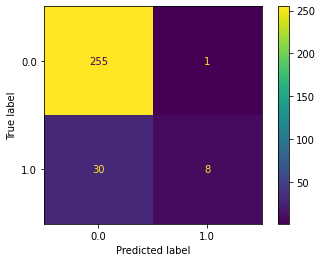

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

ConfusionMatrixDisplay.from_estimator(rfc_model, X_test, y_test)
print(classification_report(y_test, rfc_model.predict(X_test)))

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lrcInicial_model = LogisticRegression(C=0.001, solver='newton-cg')
scores = pd.DataFrame(cross_validate(lrcInicial_model, X_train, y_train, cv=10, return_train_score=True))

print("score promedio de entrenamiento = ", scores['train_score'].mean())
print("score promedio de validación = ", scores['test_score'].mean())
scores

score promedio de entrenamiento =  0.8307823302291458
score promedio de validación =  0.8307837172243951


,fit_time,score_time,test_score,train_score
0,0.066575,0.003335,0.830508,0.830813
1,0.043659,0.002982,0.830508,0.830813
2,0.060460,0.003072,0.830508,0.830813
3,0.054084,0.012876,0.830508,0.830813
4,0.063640,0.007900,0.830508,0.830813
5,0.083040,0.015744,0.830508,0.830813
6,0.058303,0.003106,0.837607,0.830028
7,0.053425,0.003063,0.829060,0.830973
8,0.046402,0.011006,0.829060,0.830973
9,0.039291,0.002550,0.829060,0.830973


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

parameters = {'C': np.logspace(-4, 4, 50),
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
lrc_rand = RandomizedSearchCV(LogisticRegression(random_state=1), n_iter=48,
                              param_distributions = parameters,
                              return_train_score=True)
lrc_rand.fit(X_train, y_train)

# despliega los mejores hiperparámetros encontrados
print("Mejores hiperparámetros\n", lrc_rand.best_params_)

Mejores hiperparámetros
 {'solver': 'liblinear', 'C': 1.7575106248547894}


In [ ]:
lrc_model = lrc_rand.best_estimator_
lrc_model.score(X_test, y_test)

0.9013605442176871

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94       256
         1.0       0.67      0.47      0.55        38

    accuracy                           0.90       294
   macro avg       0.80      0.72      0.75       294
weighted avg       0.89      0.90      0.89       294



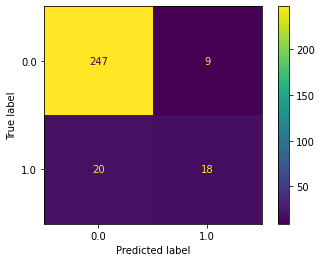

In [ ]:
ConfusionMatrixDisplay.from_estimator(lrc_model, X_test, y_test)
print(classification_report(y_test, lrc_model.predict(X_test)))

# Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnbc_model = GaussianNB()

scores = pd.DataFrame(cross_validate(gnbc_model, X_train, y_train, cv=10, return_train_score=True))

# despliega los score promedio de entrenamiento y validación, así como los
# resultados obtenidos para cada uno de los 10 folds
print("score promedio de entrenamiento = ", scores['train_score'].mean())
print("score promedio de validación = ", scores['test_score'].mean())
scores

score promedio de entrenamiento =  0.6226279027009466
score promedio de validación =  0.6165725047080979


,fit_time,score_time,test_score,train_score
0,0.025135,0.003132,0.644068,0.655009
1,0.012506,0.003222,0.694915,0.654064
2,0.007946,0.003372,0.661017,0.662571
3,0.024548,0.003026,0.322034,0.367675
4,0.010750,0.004583,0.644068,0.631380
5,0.004763,0.003178,0.644068,0.658790
6,0.005965,0.003350,0.666667,0.652502
7,0.004949,0.003253,0.572650,0.644948
8,0.005034,0.003169,0.700855,0.651558
9,0.005021,0.003180,0.615385,0.647781


              precision    recall  f1-score   support

         0.0       0.95      0.64      0.76       256
         1.0       0.24      0.79      0.37        38

    accuracy                           0.66       294
   macro avg       0.60      0.71      0.57       294
weighted avg       0.86      0.66      0.71       294



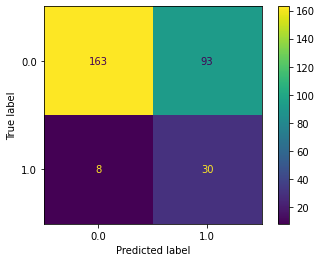

In [ ]:
gnbc_model.fit(X_train, y_train)

ConfusionMatrixDisplay.from_estimator(gnbc_model, X_test, y_test)
print(classification_report(y_test, gnbc_model.predict(X_test)))

# Support vector machine

In [ ]:
from sklearn.svm import SVC

svmc_model = SVC(C=0.01, kernel="poly")

scores = pd.DataFrame(cross_validate(svmc_model, X_train, y_train, cv=10, return_train_score=True))

print("score promedio de entrenamiento = ", scores['train_score'].mean())
print("score promedio de validación = ", scores['test_score'].mean())
scores

score promedio de entrenamiento =  0.8307823302291458
score promedio de validación =  0.8307837172243951


,fit_time,score_time,test_score,train_score
0,0.038085,0.006410,0.830508,0.830813
1,0.054716,0.008451,0.830508,0.830813
2,0.091691,0.011586,0.830508,0.830813
3,0.075997,0.007947,0.830508,0.830813
4,0.056547,0.007858,0.830508,0.830813
5,0.065303,0.007851,0.830508,0.830813
6,0.059031,0.008251,0.837607,0.830028
7,0.055630,0.009964,0.829060,0.830973
8,0.056321,0.009331,0.829060,0.830973
9,0.057780,0.008381,0.829060,0.830973


In [ ]:
parameters = {'C': [0.01, 0.1, 1, 10, 50],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
svmc_grid = GridSearchCV(SVC(random_state=1), param_grid = parameters,
                         return_train_score=True)
svmc_grid.fit(X_train, y_train)
print("Mejores hiperparámetros\n",svmc_grid.best_params_)

Mejores hiperparámetros
 {'C': 50, 'kernel': 'linear'}


In [ ]:
svmc_model = svmc_grid.best_estimator_
svmc_model.score(X_test, y_test)

0.9013605442176871

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94       256
         1.0       0.67      0.47      0.55        38

    accuracy                           0.90       294
   macro avg       0.80      0.72      0.75       294
weighted avg       0.89      0.90      0.89       294



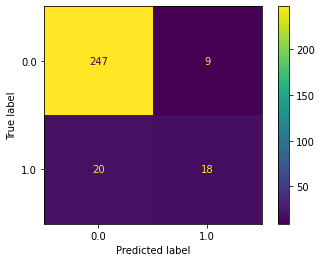

In [ ]:
ConfusionMatrixDisplay.from_estimator(svmc_model, X_test, y_test)
print(classification_report(y_test, svmc_model.predict(X_test)))

#Compare the best models obtained for the 4 supervised learning methods using their ROC curves and the values of their AUC (area under the curve).

<Figure size 432x288 with 0 Axes>

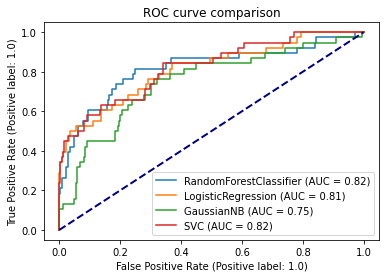

In [ ]:
from sklearn.metrics import RocCurveDisplay

plt.figure()
lw = 2
disp = RocCurveDisplay.from_estimator(rfc_model, X_test, y_test)
RocCurveDisplay.from_estimator(lrc_model, X_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(gnbc_model, X_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(svmc_model, X_test, y_test, ax=disp.ax_)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.title("ROC curve comparison")
plt.legend(loc="lower right")
plt.show()